In [ ]:
# khai báo thư viện
import pandas as pd
import os
import matplotlib.pyplot as plt
filename = input("please key in the filename: ")
df= df.read_csv(filename)
df

In [11]:
# đọc dữ liệu
path = "./Sales-Reporting-main/data/"
data = pd.read_csv(path + "sales2019_1.csv")
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


## Clean and Preprocess data

### merge 12 month data

In [21]:
# tạo 1 mảng bao gồm data của 12 tháng
frames = []
for file in os.listdir(path):
    if file.endswith('.csv'):
        filepath = path + file
        df1 = pd.read_csv(filepath)
        frames.append(df1)
        result = pd.concat(frames)
df = result
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [ ]:
df.to_csv("annualSales2019.csv", index=False) # lưu file đã merge lại

### add Month column

In [25]:
# cắt chuỗi lấy tháng trong cột Order Date
df['Month'] = df['Order Date'].str[0:2]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [30]:
# kiểm tra dữ liệu
print(set(df['Month']))

{'06', '12', '01', '05', '09', '11', '08', '10', '03', '07', '04', '02'}


### loại bỏ giá trị NaN and Or

In [27]:
# loại bỏ NaN
df = df.dropna(how='all')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [29]:
# loại bỏ Or
df = df[df['Month'] != "Or"]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


## Reporting


### What was the best month for sales

In [31]:
# kiểm tra loại dữ liệu cột
print(df['Quantity Ordered'].dtypes)
print(df['Price Each'].dtypes)

object
object


In [32]:
# convert data sang dạng số
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], downcast = 'integer')
df['Price Each'] = pd.to_numeric(df['Price Each'], downcast = 'float')

In [33]:
# kiểm tra lại
print(df['Quantity Ordered'].dtypes)
print(df['Price Each'].dtypes)

int8
float32


In [34]:
# tạo cột sales là giá trị của số lượng nhân với đơn giá
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,700.000000
1,141235,Lightning Charging Cable,1,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,14.950000
2,141236,Wired Headphones,2,11.990000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,23.980000
3,141237,27in FHD Monitor,1,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,149.990005
4,141238,Wired Headphones,1,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,11.990000


In [35]:
moving_column = df.pop('Sales') #cắt cột trong dataframe
df.insert(4,'Sales',moving_column) # di chuyển sang vị trí index mình cần
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.000000,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.950000,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.990000,23.980000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.990005,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.990000,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [39]:
# tìm giá trị của Sales và nhóm theo tháng
sales_value = df.groupby('Month').sum()['Sales']
sales_value.describe()

count    1.200000e+01
mean     2.874336e+06
std      7.931996e+05
min      1.822257e+06
25%      2.233856e+06
50%      2.727438e+06
75%      3.247370e+06
max      4.613444e+06
Name: Sales, dtype: float64

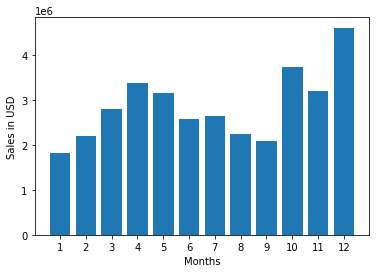

In [43]:
# trực quan hóa data doanh thu cao nhát qua tháng
months = range(1,13)
plt.bar(x=months, height=sales_value)
plt.xticks(months)
plt.xlabel("Months")
plt.ylabel("Sales in USD")
plt.show()

### ==> dựa vào biểu đồ ta thấy được tháng 12 có doanh thu cao nhất

### what city has best sales

In [46]:
# cắt dấu phẩy để lấy tên thành phố
address_to_city = lambda address: address.split(',')[1]

In [47]:
df['City'] = df['Purchase Address'].apply(address_to_city)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,141234,iPhone,1,700.000000,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,Boston
1,141235,Lightning Charging Cable,1,14.950000,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,Portland
2,141236,Wired Headphones,2,11.990000,23.980000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,San Francisco
3,141237,27in FHD Monitor,1,149.990005,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,Los Angeles
4,141238,Wired Headphones,1,11.990000,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,Austin


In [55]:
sales_value_city = df.groupby('City').sum()['Sales']
sales_value_city.max()

8262204.0

In [57]:
# lấy doanh thu theo thành phố
cities = [city for city, sales in sales_value_city.items() ]

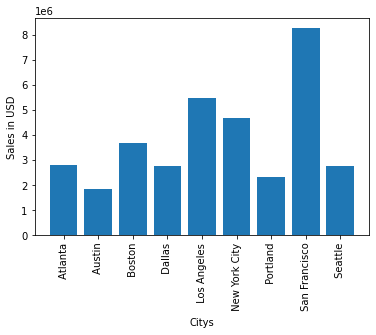

In [59]:
# trực quan hóa
plt.bar(x=cities, height=sales_value_city)
plt.xticks(cities, rotation = 90) 
plt.xlabel("Citys")
plt.ylabel("Sales in USD")
plt.show()

### ==> thành phố San fracisco có doanh thu cao nhất

### what time should we display ads to maximize the likelihood of customer's buying product

In [61]:
print(df['Order Date'].dtypes)

object


In [62]:
# convert cột Order Date đang là kiểu object sang date time để tiện sử dụng các hàm có sẵn
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [63]:
# kiểm tra lại
print(df['Order Date'].dtypes)

datetime64[ns]


In [64]:
df['Hour'] = df['Order Date'].dt.hour
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hour
0,141234,iPhone,1,700.000000,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,Boston,21
1,141235,Lightning Charging Cable,1,14.950000,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,Portland,14
2,141236,Wired Headphones,2,11.990000,23.980000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,San Francisco,13
3,141237,27in FHD Monitor,1,149.990005,149.990005,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,Los Angeles,20
4,141238,Wired Headphones,1,11.990000,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,Austin,11


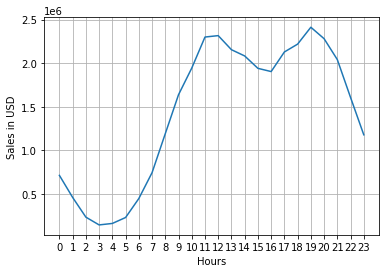

In [69]:
# trực quan hóa
sales_value_hours = df.groupby('Hour').sum()['Sales']
hours = [hour for hour, sales in sales_value_hours.items()]
plt.plot(hours, sales_value_hours)
plt.grid()
plt.xticks(hours) 
plt.xlabel("Hours")
plt.ylabel("Sales in USD")
plt.show()

### what products are most often sold together

In [71]:
# tìm các id duplicate
df_dup = df[df['Order ID'].duplicated(keep=False)]
df_dup.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hour
41,141275,USB-C Charging Cable,1,11.95,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,Austin,16
42,141275,Wired Headphones,1,11.99,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,Austin,16
57,141290,Apple Airpods Headphones,1,150.00,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8
58,141290,AA Batteries (4-pack),3,3.84,11.52,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8
133,141365,Vareebadd Phone,1,400.00,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",01,New York City,11


In [74]:
groupProdcut = lambda product: ', '.join(product)

In [75]:
# tạo cột mới có chưa các sản phẩm có id trùng nhau ở trên
df_dup['All Products'] = df_dup.groupby('Order ID')['Product'].transform(groupProdcut)
df_dup.head()

<ipython-input-75-e1ceca087cb5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['All Products'] = df_dup.groupby('Order ID')['Product'].transform(groupProdcut)


,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hour,All Products
41,141275,USB-C Charging Cable,1,11.95,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,Austin,16,"USB-C Charging Cable, Wired Headphones"
42,141275,Wired Headphones,1,11.99,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,Austin,16,"USB-C Charging Cable, Wired Headphones"
57,141290,Apple Airpods Headphones,1,150.00,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8,"Apple Airpods Headphones, AA Batteries (4-pack)"
58,141290,AA Batteries (4-pack),3,3.84,11.52,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8,"Apple Airpods Headphones, AA Batteries (4-pack)"
133,141365,Vareebadd Phone,1,400.00,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",01,New York City,11,"Vareebadd Phone, Wired Headphones"


In [77]:
# bỏ các hàng trùng lặp
df_dup[['Order ID','All Products']].drop_duplicates()

,Order ID,All Products
41,141275,"USB-C Charging Cable, Wired Headphones"
57,141290,"Apple Airpods Headphones, AA Batteries (4-pack)"
133,141365,"Vareebadd Phone, Wired Headphones"
153,141384,"Google Phone, USB-C Charging Cable"
220,141450,"Google Phone, Bose SoundSport Headphones"
...,...,...
11617,259296,"Apple Airpods Headphones, Apple Airpods Headph..."
11619,259297,"iPhone, Lightning Charging Cable, Lightning Ch..."
11627,259303,"34in Ultrawide Monitor, AA Batteries (4-pack)"
11639,259314,"Wired Headphones, AAA Batteries (4-pack)"


In [79]:
df_dup['All Products'].value_counts(10)

iPhone, Lightning Charging Cable           0.120418
Google Phone, USB-C Charging Cable         0.116868
iPhone, Wired Headphones                   0.049287
Vareebadd Phone, USB-C Charging Cable      0.042597
Google Phone, Wired Headphones             0.041368
                                             ...   
27in FHD Monitor, LG Washing Machine       0.000137
iPhone, 27in FHD Monitor                   0.000137
LG Dryer, Google Phone                     0.000137
Vareebadd Phone, 27in FHD Monitor          0.000137
ThinkPad Laptop, 27in 4K Gaming Monitor    0.000137
Name: All Products, Length: 366, dtype: float64

### what product sold the most and why

In [81]:
all_products = df.groupby('Product').sum()['Quantity Ordered']
all_products

Product
20in Monitor                   4129.0
27in 4K Gaming Monitor         6244.0
27in FHD Monitor               7550.0
34in Ultrawide Monitor         6199.0
AA Batteries (4-pack)         27635.0
AAA Batteries (4-pack)        31017.0
Apple Airpods Headphones      15661.0
Bose SoundSport Headphones    13457.0
Flatscreen TV                  4819.0
Google Phone                   5532.0
LG Dryer                        646.0
LG Washing Machine              666.0
Lightning Charging Cable      23217.0
Macbook Pro Laptop             4728.0
ThinkPad Laptop                4130.0
USB-C Charging Cable          23975.0
Vareebadd Phone                2068.0
Wired Headphones              20557.0
iPhone                         6849.0
Name: Quantity Ordered, dtype: float64

In [83]:
prices =  df.groupby('Product').mean()['Price Each']
prices

Product
20in Monitor                   109.989998
27in 4K Gaming Monitor         389.989990
27in FHD Monitor               149.990005
34in Ultrawide Monitor         379.989990
AA Batteries (4-pack)            3.840000
AAA Batteries (4-pack)           2.990000
Apple Airpods Headphones       150.000000
Bose SoundSport Headphones      99.989998
Flatscreen TV                  300.000000
Google Phone                   600.000000
LG Dryer                       600.000000
LG Washing Machine             600.000000
Lightning Charging Cable        14.950000
Macbook Pro Laptop            1700.000000
ThinkPad Laptop                999.989990
USB-C Charging Cable            11.950000
Vareebadd Phone                400.000000
Wired Headphones                11.990000
iPhone                         700.000000
Name: Price Each, dtype: float32

<ipython-input-86-4d4664b044d5>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products_ls, rotation=90)


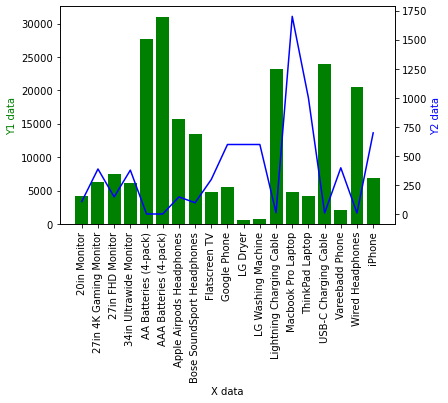

In [86]:
products_ls = [product for product , quant in all_products.items()]
x= products_ls
y1 = all_products
y2 = prices

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(x,y1, color = 'g')
ax2.plot(x,y2, 'b-')

ax1.set_xticklabels(products_ls, rotation=90)
ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data', color = 'g')
ax2.set_ylabel('Y2 data', color = 'b')
plt.show()